# 05: Correlations 

The presence of regularity among pairs of X and Y scores indicates that the two variables are related, and te absence of any regularity suggests that the two variables are, at most, only slightly related. 

- **Positive Relationship**: Occurs insofar as pairs of scores tend to occupy similar relative positions (high with high and low with low) in their respective distributions. 

- **Negative Relationship**: Occurs insofar as pairs of scores tend to occupy dissimilar relative positions (high with low and vice versa) in their respective distributions. 

- **Scatterplot**: A graph containing a cluster of dots that represents all pairs of scores. 

- **Linear Relationship**: A relationship that can be described best with a straight line. 

- **Curvilinear Relationship**: A relationship that can be described best with a curved line. 

- **Correlation Coefficient**: A number between -1 and 1 that describes the relationship between pairs of variables. 

- **Pearson Correlation Coefficient (r)**: A number between -1.00 and +1.00 that describes the linear relationship between pairs of quantitative variables. 

        - r in the vicinity of 0.10 or less reflects a weak relationship 
        - r in the vicinity of 0.30 reflects a moderate relationship
        - r in the vicinity of 0.50 or more reflects a strong relationship 

- A correlation coefficient, regardless of size, never provides information about whether an observed relationship reflects a simple cause-effect relationship or some more complex state of affairs. 

- **Correlation Matrix**: Table showing correlations for all possible pairs of variables. 

In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import math

In [48]:
df = pd.DataFrame([[13, 14], [9, 18], [7, 12], [5, 10], [1, 6]], index=['Doris', 'Steve', 'Mike', 'Andrea', 'John'], columns=['Sent', 'Received'])

df

,Sent,Received
Doris,13,14
Steve,9,18
Mike,7,12
Andrea,5,10
John,1,6


<AxesSubplot:xlabel='Sent', ylabel='Received'>

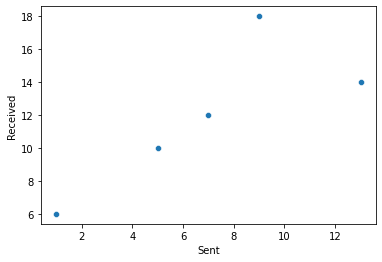

In [49]:
sns.scatterplot(x='Sent', y='Received', data=df)

- A dot cluster that has a slope from lower left to upper right reflects a positive relationship. 

- A dot cluster that has a slope from upper left to lower right reflects a negative relationship. 

- A dot cluster that lacks any apparent slope reflects little or no relationship. 

- The more closely a dot cluster approximates a straight line, the stronger (the more regular) the relationship will be. 

## Correlation Coefficient 

- **Correlation Coefficient**: A number between -1 and 1 that describes the relationship between pairs of variables. 

- **Pearson Correlation Coefficient (r)**: A number between -1.00 and +1.00 that describes the linear relationship between pairs of quantitative variables.

- The sign of $r$ indicates the type of linear relationship, whether positive or negative. 

- The numerical value of $r$, without regard to sign, indicates the strength of the linear relationship. 

        - r in the vicinity of 0.10 or less reflects a weak relationship 
        - r in the vicinity of 0.30 reflects a moderate relationship
        - r in the vicinity of 0.50 or more reflects a strong relationship 

- $r$ is independent of units of measurement. The value of $r$ depends only on the pattern among pairs of scores. 

- Range restrictions will usually cause the numerical value of $r$ to decline. 

- The value of $r$ cannot be interpreted as a proportion or percentage of some perfect relationship. 

- $r$ is sensitive to outliers and thus, it is best practice to include the value of $r$ both with and without outliers

- A correlation coefficient, regardless of size, never provides information about whether an observed relationship reflects a simple cause-effect relationship or some more complex state of affairs. 


$$
r = \dfrac{SP_{xy}}{\sqrt{SS_xSS_y}}
$$

</br>

$$
SS_x = \sum{(X - \bar{X})^2} = \sum(X^2) - \dfrac{(\sum{X})^2}{n}
$$

$$
SS_y = \sum{(Y - \bar{Y})^2} = \sum(Y^2) - \dfrac{(\sum{Y})^2}{n}
$$

</br>

$$
SP_{xy} = \sum{(X - \bar{X})(Y - \bar{Y})} = \sum{XY} - \dfrac{(\sum{X})(\sum{Y})}{n}
$$

In [50]:
def ss(X): 
    m = sum(X)/len(X)
    return sum([(x - m)**2 for x in X])

In [51]:
def spxy(X, Y): 
     mx = sum(X)/len(X)
     my = sum(Y)/len(Y)
     XY = []
     for i in range(len(X)):
          XY.append((X[i], Y[i]))
     return sum((x-mx)*(y-my) for x,y in XY)

In [52]:
def pearson_r(X, Y): 
    return spxy(X, Y) / (math.sqrt(ss(X)*ss(Y)))

In [53]:
couples = {
    'X': [1, 3, 2, 3, 1, 2],
    'Y': [2, 4, 3, 2, 0, 3]
    }
df = pd.DataFrame(couples, index=['A', 'B', 'C', 'D', 'E', 'F'])

df

,X,Y
A,1,2
B,3,4
C,2,3
D,3,2
E,1,0
F,2,3


In [54]:
df.corr()

,X,Y
X,1.000000,0.654654
Y,0.654654,1.000000


In [55]:
df.corr().loc['X', 'Y']

0.6546536707079771

In [56]:
pearson_r(couples['X'], couples['Y'])

0.6546536707079771